In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [68]:
# Import data from local files
df_white = pd.read_csv('Data/winequality-white.csv')
df_red = pd.read_csv('Data/winequality-red.csv')

In [15]:
# All features
print(list(df_white.columns))

# Size of each dataset
print("Number of white wine samples: " + str(df_white.size))
print("Number of red wine samples: " + str(df_red.size))

['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']
Number of white wine samples: 4898
Number of red wine samples: 1599


In [69]:
# Function to clean wine quality datasets
def clean_wine_df(df):
    # Column headings are concatenated; need to split each feature into a list
    cols_string = list(df.columns)[0]
    cols_list = cols_string.replace('\"', '').split(";")

    # Split up concatenated sample values and cast to numeric type
    rows_str_list = df[cols_string].to_list() # Holds each row as a string
    rows_str_list = [x.split(";") for x in rows_str_list] # Holds each row as a list of strings
    rows_float_list = [[float(y) for y in x] for x in rows_str_list] # Cast every element to float

    # Combine cleaned rows and columns into a new dataframe
    df = pd.DataFrame(rows_float_list, columns = cols_list)
    
    return df


In [70]:
# Apply cleaning to both datasets
df_white = clean_wine_df(df_white)
df_red = clean_wine_df(df_red)

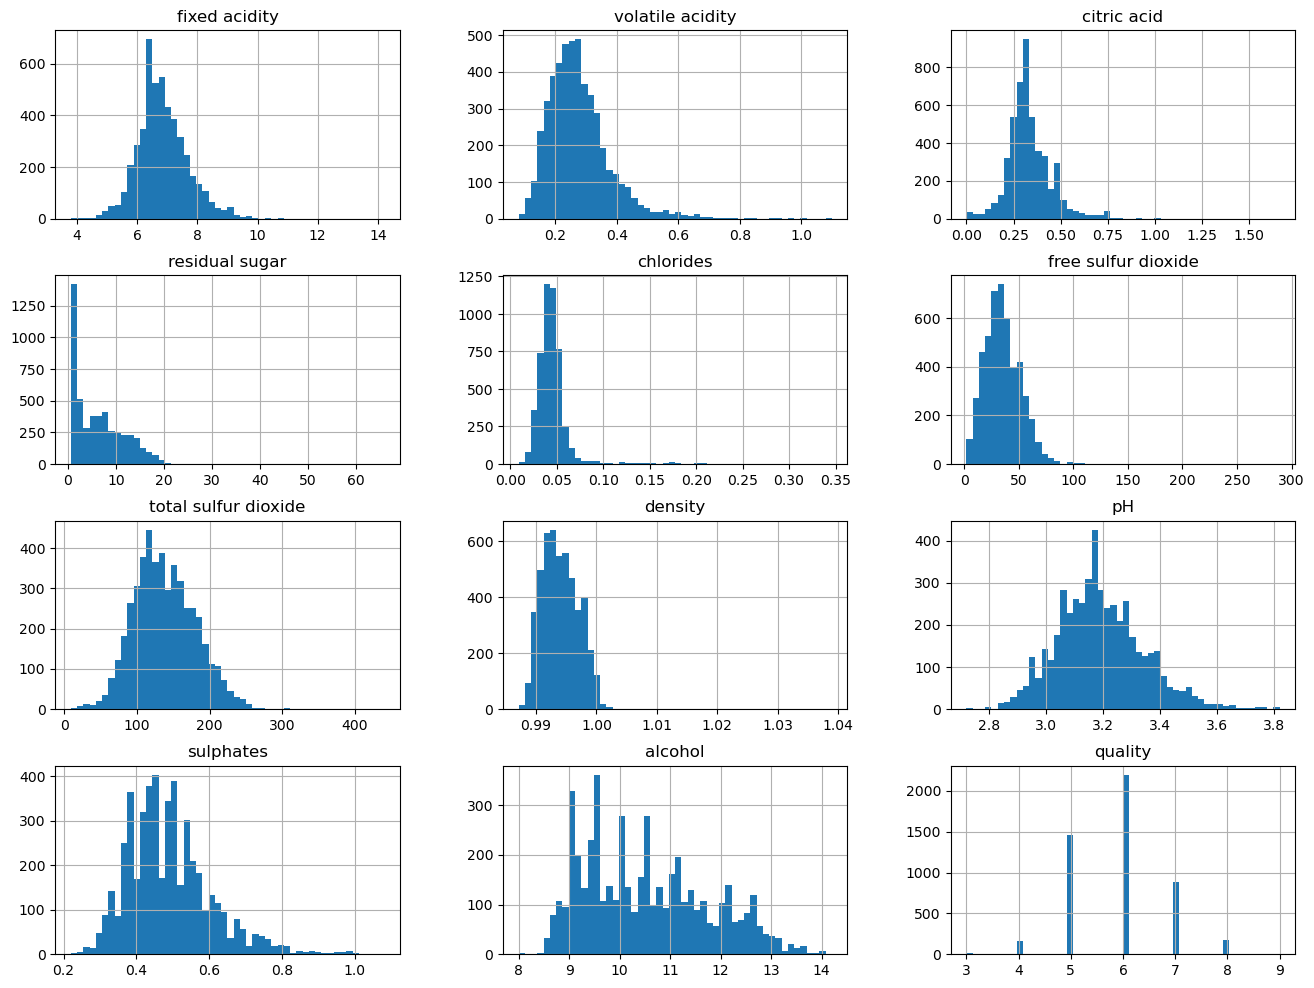

In [80]:
# Plot histogram of each feature for white wine
df_white.hist(bins=50, figsize=(16,12))
plt.show()

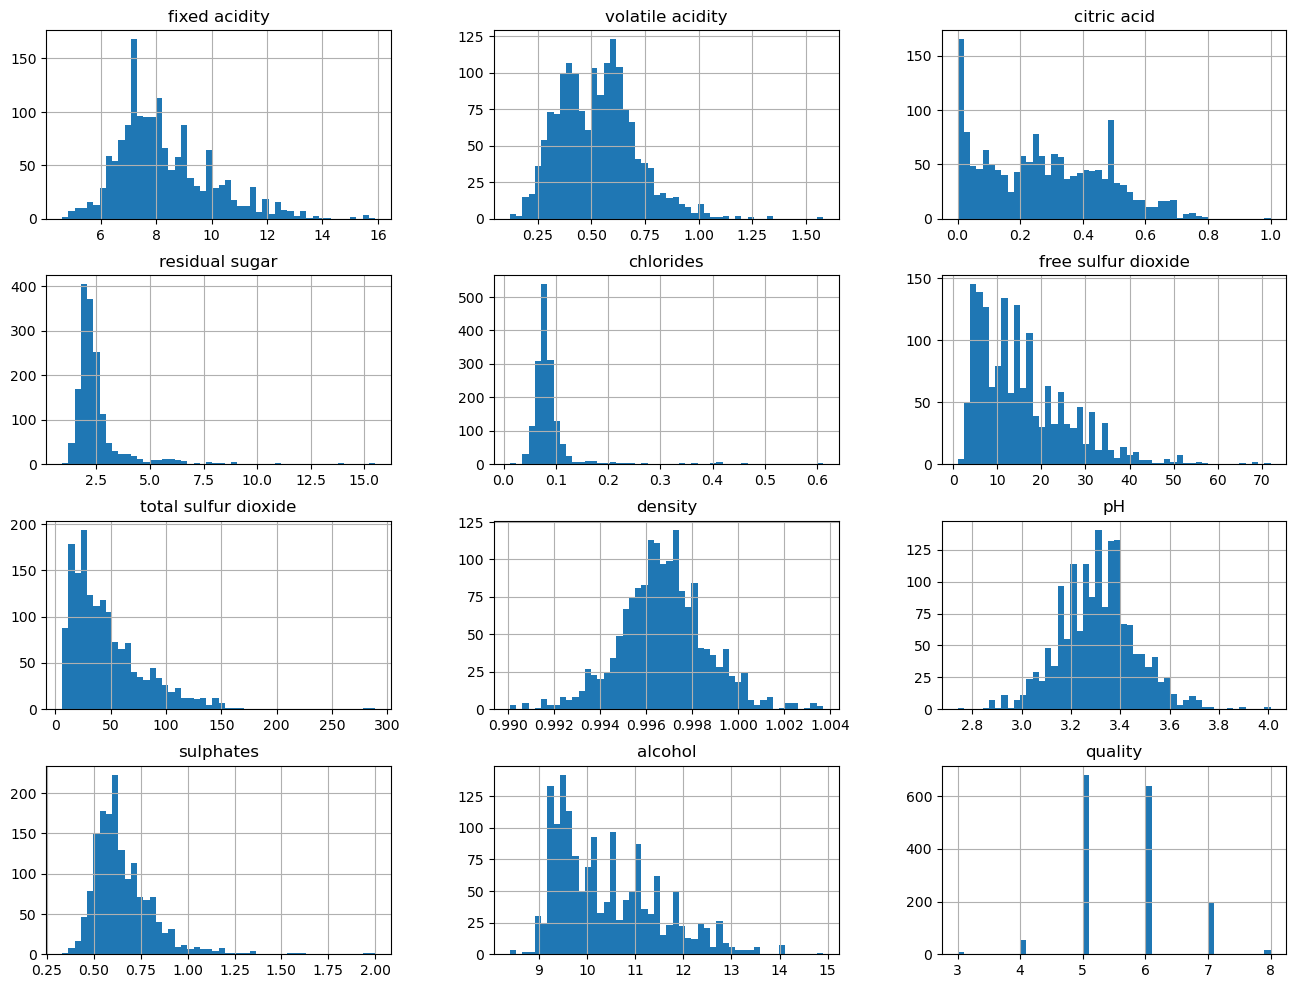

In [82]:
# Plot histogram of each feature for red wine
df_red.hist(bins=50, figsize=(16,12))
plt.show()

In [79]:
# Split data into training and test sets
train_w, test_w = train_test_split(df_white, test_size = 0.2, random_state = 42)
train_r, test_r = train_test_split(df_red, test_size = 0.2, random_state = 42)

# Stratified sampling (?)

In [178]:
# Function to try different attribute combinations and return N highest correlations
def try_attr_combos(df, cols, top_n):
    new_rows = []
    new_cols = []
    
    for attr_1 in cols:
        for attr_2 in cols:
            if (attr_1 != attr_2):
                col = attr_1 + "/" + attr_2
                new_cols.append(col)
                row = df[attr_1]/df[attr_2]
                new_rows.append(list(row.values))
    
    new_rows = np.array(new_rows).transpose()
    new_attrs_df = pd.DataFrame(new_rows, columns = new_cols)
    #print(new_attrs_df.head())
    return new_attrs_df

In [179]:
# Only using white wine data starting here
# Examine correlations
corr_matrix = train_w.corr()

# View attributes most to least correlated with quality and get the top 4
corr_sorted = corr_matrix["quality"].sort_values(ascending=False)
corr_high_cols = list(corr_sorted[1:4].axes[0])
new_attrs_df = try_attr_combos(train_w, corr_high_cols, 0)

train_w_aug = pd.concat([df, train_w_a])
#print(corr_sorted)

   alcohol/pH  alcohol/sulphates  pH/alcohol  pH/sulphates  sulphates/alcohol  \
0    3.949045          30.243902    0.253226      7.658537           0.033065   
1    2.987421          18.269231    0.334737      6.115385           0.054737   
2    3.415385          22.653061    0.292793      6.632653           0.044144   
3    3.364486          20.000000    0.297222      5.944444           0.050000   
4    3.250000          20.800000    0.307692      6.400000           0.048077   

   sulphates/pH  
0      0.130573  
1      0.163522  
2      0.150769  
3      0.168224  
4      0.156250  


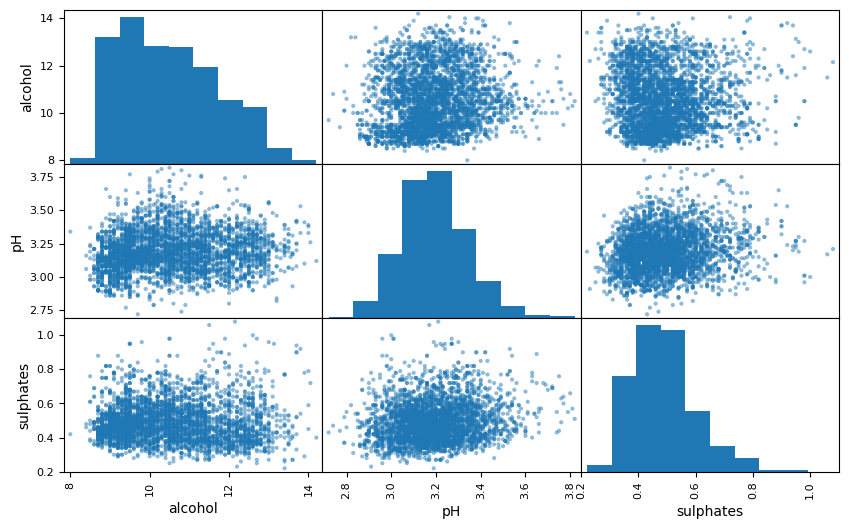

In [104]:
# Plot top 4 correlations in a scatter matrix
scatter_matrix(train_w[corr_high_cols], figsize=(10,6))
plt.show()